In [1]:
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator

In [7]:
data = pd.read_excel('E:/文档系列/python 系列/TheData/total/11clean_area_invesments(91-17-RMB).xlsx')
data.rename(columns={'投资金额(RMB)':'new_money','实际地区':'area','投资时间':'years','投资币种':'invest_currency'}, inplace = True)

In [8]:
data[0:1]

,City,P/E,企业估值,企业估值(USD/M),企业净利润(百万元),企业净资产(百万元),企业名称,企业总资产(百万元),企业销售收入(百万元),地区,...,二级名称,一级字母代码,一级名称,一二三产业,投资金额(M),补全的地区,area,change,new_money,city
0,江门市,--,--,--,--,--,三捷电池,--,--,中国|广东省|江门市|蓬江区,...,电气机械和器材制造业,C,制造业,第二产业,0.0,中国|广东省|江门市|蓬江区,中国|广东省|江门市|蓬江区,0.0,0.0,江门


In [11]:
# data.loc[data['money'].str.contains('-')==True,'money']='0'
# data.loc[data['money'].isin(['不披露'])==True,'money']='0'
# data['area'].isnull().value_counts()
# data['area']=data['area'].fillna('999')
def getstr(s):
    return str(s)[:4]
data['get_year'] = data.years.map(getstr)
yearsL = list(map(str,list(range(1991,2018))))

In [12]:
M=data.groupby('get_year').new_money.sum().reindex(index=yearsL)

In [29]:
Ytimes=[]
for j in range(len(yearsL)):
    nn=0
    for i in range(data.shape[0]):
        if data.iloc[i:i+1,41:42].values== yearsL[j] and data.iloc[i:i+1,39:40].values!=0:
            nn+=1
    Ytimes.append(nn)

D:\Users\lu\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


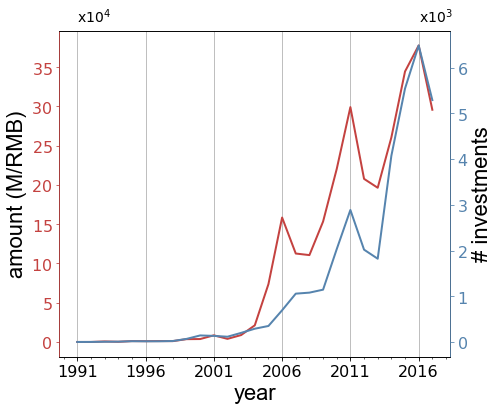

In [31]:
from matplotlib.ticker import FuncFormatter   ### 今天的主角
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 22,
}###设置横纵坐标的字体格式

############## 用科学计数法表示坐标 ################
x=np.arange(1991,2018)
y=np.array(M)
fig = plt.figure(figsize=(7,6))
xmajorLocator = MultipleLocator(5)
xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=16) #刻度字体大小13
 
ax1 = fig.add_subplot(111)
ax1.plot(yearsL,y, color = '#c44240',linewidth=2)
# ax1.set_yscale('log')
ax1.set_ylabel('amount (M/RMB)',font2)
ax1.set_xlabel('year',font2)
# ax1.legend(loc='upper left')
ax1.yaxis.set_tick_params(color='#c44240',colors='#c44240',labelsize=16)
def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % (x/10000)
#     return '$%.1f$x$10^{4}$' % (x/10000)
def formatnum2(x, pos):
    return '$%.0f$' % (x/1000)
formatter = FuncFormatter(formatnum)
formatter2 = FuncFormatter(formatnum2)
ax1.yaxis.set_major_formatter(formatter)
 
ax2 = ax1.twinx()  # this is the important function
ax2.plot(yearsL,Ytimes,  color = '#5684ae',linewidth=2)
ax2.set_ylabel('# investments',font2)
# ax2.set_yscale('log')
ax2.spines['left'].set_color('#c44240')
ax2.spines['right'].set_color('#5684ae')
# ax2.legend(loc='upper right')
# ax2.spines['left'].set_linewidth(3)
# ax2.spines['right'].set_linewidth(3)
ax2.yaxis.set_tick_params(color='#5684ae',colors='#5684ae',labelsize=16)
ax2.yaxis.set_major_formatter(formatter2)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
ax1.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
plt.text(25, 7000, r'x$10^{3}$',size=14)
plt.text(0,7000, r'x$10^{4}$',size=14)
# plt.savefig('E:/文档系列/python 系列/picScalling/Fig1a.pdf')
plt.show()